Full data shape: (354694, 12)
Index(['Local_time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid',
       'Volume_Bid', 'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask',
       'Volume_Ask', 'Local_time_T'],
      dtype='object')
Start index: 21463
End index: 21926


C:\Users\sudha\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



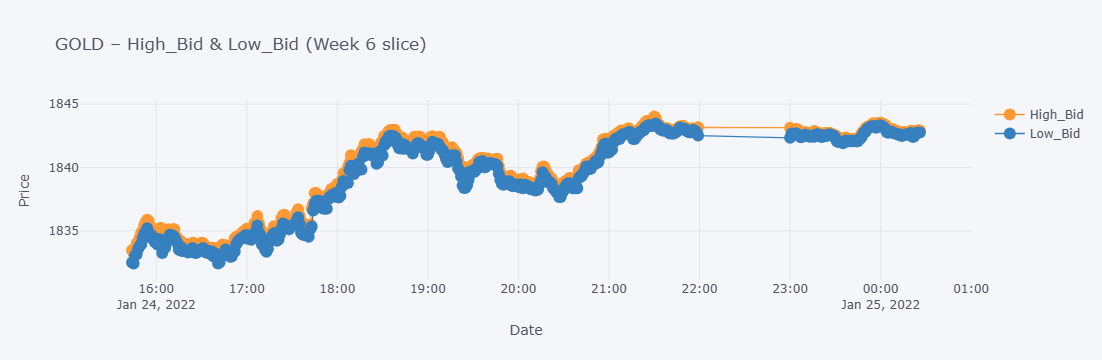

In [1]:
import pandas as pd
import numpy as np

import plotly.offline as py
import cufflinks as cf

# Activate offline plotting for iplot
py.init_notebook_mode(connected=True)
cf.go_offline()

# ---------------------------------------------------------
# 1. Load Bid and Ask minute data (2022)
# ---------------------------------------------------------
bid_path = "XAUUSD_1 Min_Bid_2022.01.01_2022.12.31 (1).csv"
ask_path = "XAUUSD_1 Min_Ask_2022.01.01_2022.12.31 (1).csv"

df_bid = pd.read_csv(bid_path)
df_ask = pd.read_csv(ask_path)

# ---------------------------------------------------------
# 2. Rename columns so they match the practical notebook style
#    and merge into one df_2022 table
# ---------------------------------------------------------
df_bid = df_bid.rename(columns={
    "Time (UTC)": "Local_time",
    "Open": "Open_Bid",
    "High": "High_Bid",
    "Low": "Low_Bid",
    "Close": "Close_Bid",
    "Volume ": "Volume_Bid"
})

df_ask = df_ask.rename(columns={
    "Time (UTC)": "Local_time",
    "Open": "Open_Ask",
    "High": "High_Ask",
    "Low": "Low_Ask",
    "Close": "Close_Ask",
    "Volume ": "Volume_Ask"
})

# Merge Bid and Ask on time
df_2022 = pd.merge(df_bid, df_ask, on="Local_time")

# Convert time to datetime and call it Local_time_T
df_2022["Local_time_T"] = pd.to_datetime(df_2022["Local_time"])

# For convenience, we will call this 'data' as in the practical notebook
data = df_2022.copy()

print("Full data shape:", data.shape)
print(data.columns)

# ---------------------------------------------------------
# 3. Use SID to define start index and time window
#    SID = 2421463 → last 5 digits = 21463, last 3 digits = 463
# ---------------------------------------------------------
sid = "2421463"
start_idx = int(sid[-5:])   # 21463
period_minutes = int(sid[-3:])  # 463
end_idx = start_idx + period_minutes   # slicing end index (exclusive)

print("Start index:", start_idx)
print("End index:", end_idx)

# ---------------------------------------------------------
# 4. Create the slice and plot High_Bid and Low_Bid with iplot()
# ---------------------------------------------------------
data_slice = data.iloc[start_idx:end_idx,
                       :][["High_Bid", "Low_Bid",
                           "Local_time_T", "Volume_Ask", "Volume_Bid"]]

data_slice.iplot(
    x="Local_time_T",
    y=["High_Bid", "Low_Bid"],
    mode="lines+markers",
    xTitle="Date",
    yTitle="Price",
    title="GOLD – High_Bid & Low_Bid (Week 6 slice)"
)
